<b>ΕΙΣΑΓΩΓΗ</b>

Για την εξαμηνιαία εργασία του μαθήματος "Ανάλυση και Εξόρυξη Δεδομένων Μεγάλης Κλίμακας", ζητήθηκε η ανάλυση ενός συνόλου δεοδμένων, η οπτικοποίηση των δεδομένων και των ευρημάτων και η απάντηση ερωτημάτων μέσω προγραμματισμού για την εξαγωγή γνώσης.<br>

<b>ΕΡΩΤΗΜΑΤΑ:<br>
1)DESCRIPTIVE STATISTICS<br>
2)ΑΝΑΛΥΣΗ ΠΑΛΙΝΔΡΟΜΗΣΗΣ-LINEAR REGRESSION OF TIME & VALUE, GENDER & VALUE, ΜΑΘΗΜΑ & VALUE<br>
3)ANOVA-ΑΝΑΛΥΣΗ ΔΙΑΚΥΜΑΝΣΗΣ<br>
4)LOGISTIC REGRESSION<br>
5)CLUSTERING: k-MEANS<br>
6)MULTIVARIATE ANALYSIS: PCA<br>
7) FORECASTING W/ AUTOREGRESSION<br>
8)ATTEMPTS

Παρακάτω παρατείθενται τα πακέτα και οι βιβλιοθήκες που χρησιμοποιήθηκαν για την ανάλυση του dataset.<br>
<l>NUMPY: εργαλείο διαχείρησης αριθμητικών δεδομένων(κυρίως πινάκων)<br>
PANDAS:εργαλείο για ανάλυση & manipualtion δεδομένων<br>
MATPLOTLIB: για τη δημιουργία γραφημάτων<br>
SEABORN: βασίζεται στην matplotlib, για τη δημιουργία προχωρημένων στατιστικών γραφημάτων<br>
SCIPY: βιβλιοθήκη αλγορίθμων στατιστικής ανάλυσης<br>
SKLEARN: βιβλιοθήκη για prediction,classification,regression,clustering etc.<br>
</l>

Στη συγκεκριμένη αναφορά, χρησιμοποιήθηκε το προτεινόμενο σύνολο δεδομένων που αφορούσε δεδομένα από τον παγκόσμιο διαγωνισμό PISA κατά το έτος 2000 μέχρι και το 2018 (να σημειωθεί ότι δεν περιείχε δεδομένα από κάθε έτος). Το σύνολο δεδομένων αποτελείται από τη χώρα (LOCATION), το μάθημα εξέτασης (INDICATOR), το φύλο του εξεταζόμενου (SUBJECT), το έτος (TIME), το σκορ που πέτυχε(Value). Το μέγεθος είναι 2087 γραμμές και 6 στήλες.

In [21]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

In [9]:
pisa_df

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,2085,LTU,PISASCIENCE,BOY,2018,479.000


<b>ΚΑΤΑΝΟΜΗ</b><br>
Τα αριθμητικά δεδομένα ακολουθούν Κανονική Κατανομή (ύστερα από απεικόνιση του ιστογράμματος), άρα θα εφαρμοστούν παραμετρικές τεχνικές για την ανάλυση του.

(array([ 12.,  62.,  94.,  80., 130., 319., 703., 500., 160.,  27.]),
 array([348. , 370.6, 393.2, 415.8, 438.4, 461. , 483.6, 506.2, 528.8,
        551.4, 574. ]),
 <BarContainer object of 10 artists>)

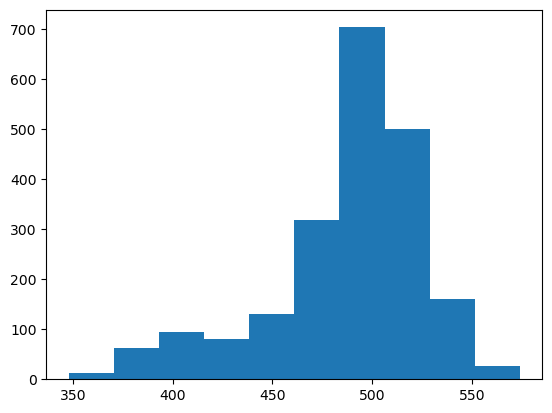

In [18]:
plt.hist(pisa_df.Value)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


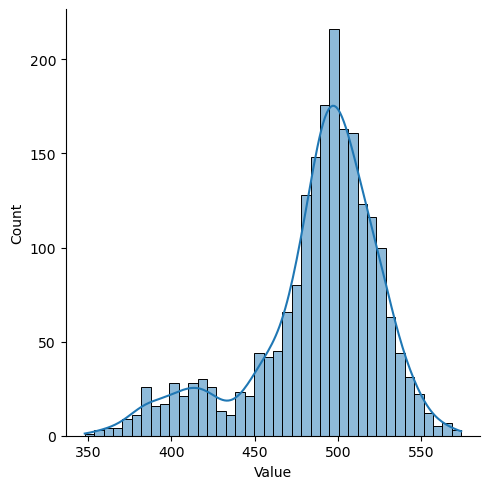

In [28]:
sb.displot(pisa_df.Value, kde=True)
plt.show()

<b>ΠΟΙΑ ΕΙΝΑΙ Η ΚΑΤΑΝΟΜΗ ΤΩΝ ΣΥΜΜΕΤΕΧΟΝΤΩΝ ΑΝΑ ΧΩΡΑ?

Παρακάτω απεικονίζεται η συμμετοχή των χωρών στο διαγωνισμό. Από τις χώρες με τη μεγαλύτερη συμμετοχή είναι αγγλοσαξονικά κράτη όπως η αυστραλία καθώς και ευρωπαϊκές χώρες, όπως η Σουηδία και η Φινλανδία. Αξιοσημείωτο είναι πως στις χώρες με τη μικρότερη συμμετοχή ανήκουν η Σιγκαπούρη, το Χονγκ Κονγκ και η Ταϊβάν, παρόλο που πετυχαίνουν πολύ υψηλά σκορ τα τελευταία έτη, όπως θα παρουσιαστεί και παρακάτω.

In [36]:
countries_size = pisa_df.groupby('LOCATION').size().reset_index(name='counts')

<Axes: xlabel='counts', ylabel='LOCATION'>

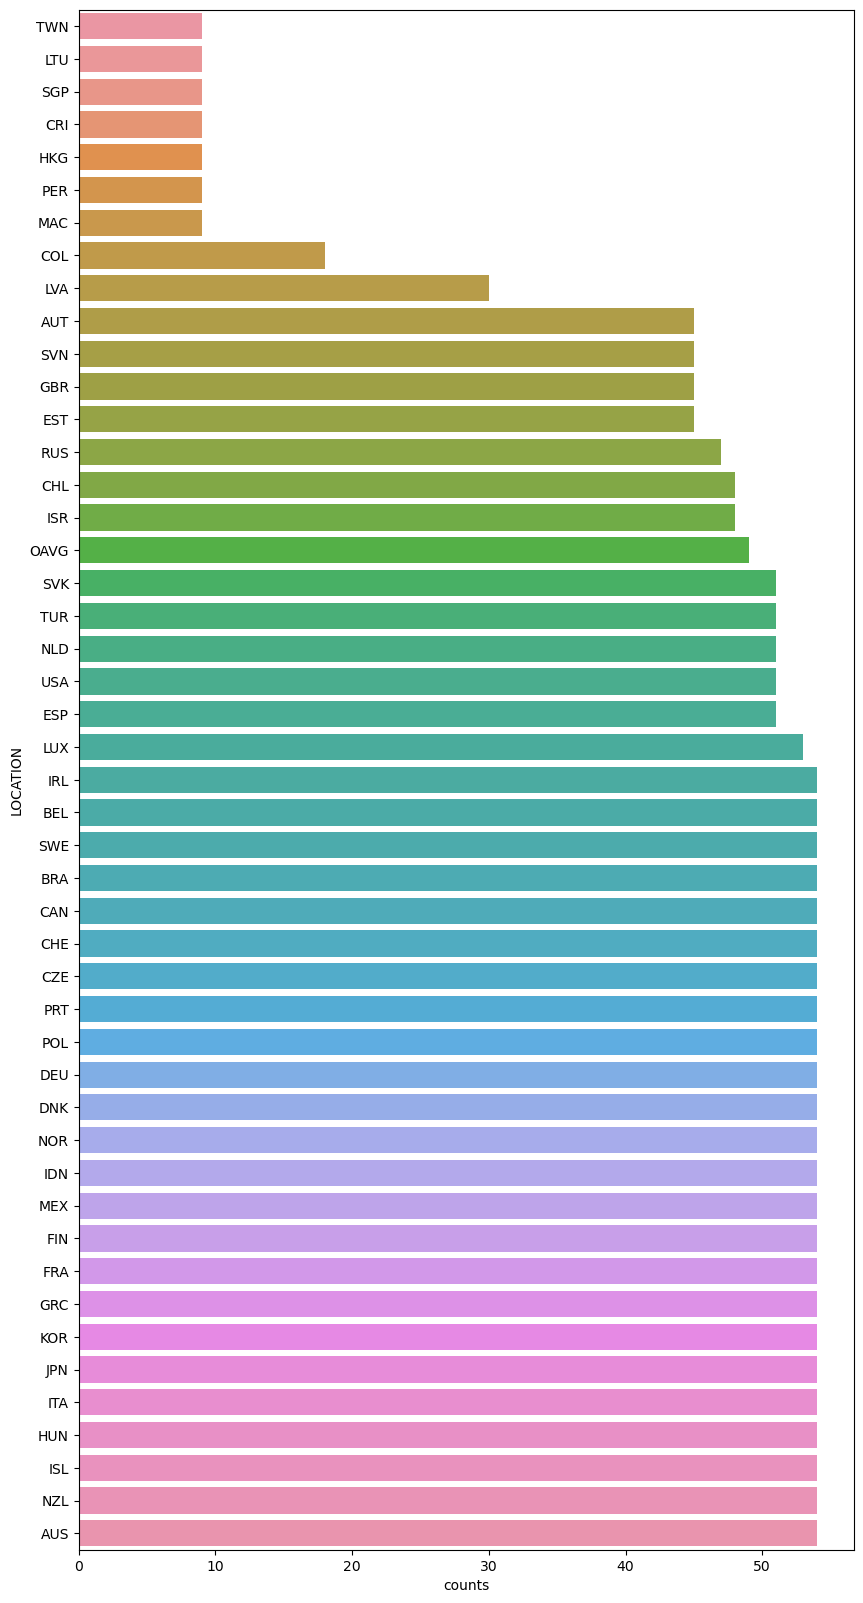

In [39]:
countries_size.sort_values(by='counts', inplace=True)
plt.figure(figsize = [10,20])
sb.barplot(x=countries_size.counts, y=countries_size.LOCATION, data=countries_size)

<b> ΠΟΙΑ ΕΙΝΑΙ Η ΔΙΑΦΟΡΑ ΣΤΗΝ ΑΠΟΔΟΣΗ ΑΝΑΜΕΣΑ ΣΤΑ 2 ΦΥΛΑ?

Πολλές φορές αναφέρεται πως τα αγόρια έχουν μια κλίση προς τις θετικές επιστήμες σε σύγκριση με τα κορίτσια. Γι' αυτό πραγματοποίησα σύγκριση των σκορ στην εξέταση μαθημάτων των 2 φύλων.

Αναφορικά με τα μαθηματικά, τα αγόρια υπερταιρούν των κοριτσιών, ενώ τα τελευταία φαίνεται να έχουν την πρωτιά στο reading καθ' όλα τα έτη. Τα σκορ και των 2 φύλων στις επιστήμες δείχνουν πως είναι παρόμοια, με μικρή διαφορά των αγοριών.

Στο τρίτο γράφημα φαίνεται και συγκεντρωτικά η διαφορά στην απόδοση.

<b>BOYS

In [44]:
pisa_boys = pisa_df[pisa_df['SUBJECT'] == 'BOY']

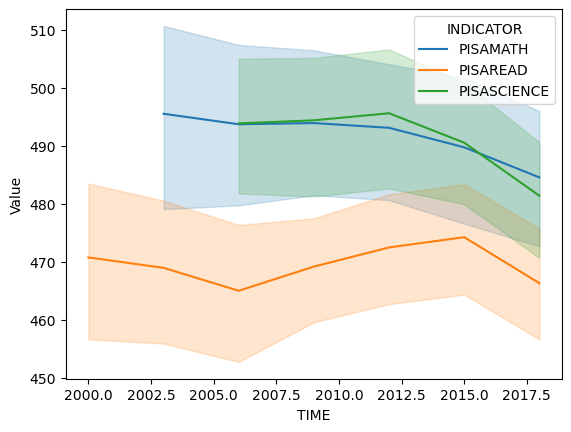

In [59]:
sb.lineplot(x='TIME', y='Value', data=pisa_boys, hue='INDICATOR')
plt.show()

<b>GIRLS

In [47]:
pisa_girls = pisa_df[pisa_df['SUBJECT'] == 'GIRL']

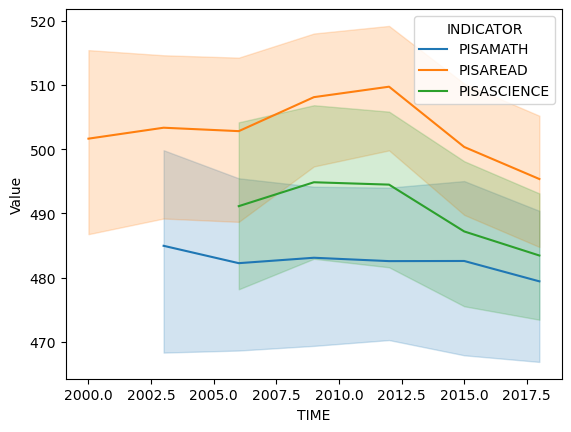

In [63]:
sb.lineplot(x='TIME', y='Value', data=pisa_girls, hue='INDICATOR')
plt.show()

In [75]:
gender = pisa_df.groupby(by=['SUBJECT', 'INDICATOR']).agg({'Value' : 'mean'})
gender.reset_index(inplace=True)

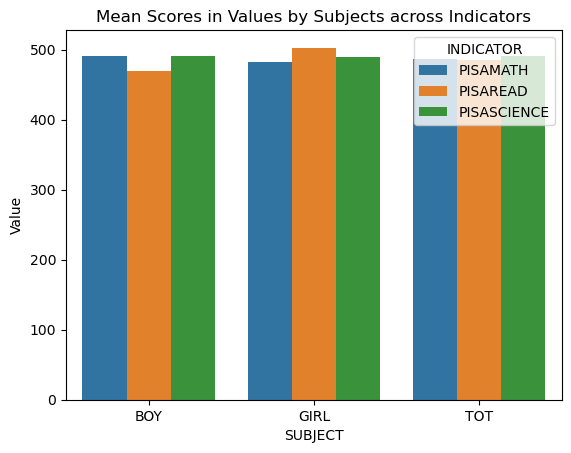

In [78]:
sb.barplot(x='SUBJECT', y='Value', data=gender, hue='INDICATOR')
plt.title("Mean Scores in Values by Subjects across Indicators")
plt.show()

Ο παρακάτω πίνακας, φανερώνει τις υψηλότερες βαθμολογίες ανά μάθημα ανάλογα με το φύλο.
Αξίζει να σημειωθεί πως παρά το γεγονός ότι κατά μέσο όρο τα αγορια έιχαν πολύ καλύτερο σκορ στα μαθηματικά και στις επιστήμες, αγόρια και κορίτσια πέτυχαν (σε ξεχωριστές περιπτώσεις) το ίδο maximum σκορ στα μαθηματικά, ενώ το max σκορ κοριτσιού στις επιστήμες ήταν μεγαλύτερο από το αντίστοιχο του αγοριού.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.workingmums.co.uk%2Fwp-content%2Fuploads%2F2018%2F10%2FFotolia_209055398_Subscription_Monthly_M.jpg&f=1&nofb=1&ipt=6e0b0cd445b0e46b9bdde0780b312d7e69c2c48a0fffe468acd3d4aa74d9336d&ipo=images" width="250" height="300">

In [84]:
gender2 = pisa_df.groupby(by=['SUBJECT', 'INDICATOR']).agg({'Value' : 'max'})
gender2.reset_index(inplace=True)
gender2

,SUBJECT,INDICATOR,Value
0,BOY,PISAMATH,564.0
1,BOY,PISAREAD,539.0
2,BOY,PISASCIENCE,562.0
3,GIRL,PISAMATH,564.0
4,GIRL,PISAREAD,574.0
5,GIRL,PISASCIENCE,565.0
6,TOT,PISAMATH,564.0
7,TOT,PISAREAD,556.0
8,TOT,PISASCIENCE,563.0


<b>ΠΟΙΕΣ ΧΩΡΕΣ ΕΠΙΤΥΓΧΑΝΟΥΝ ΥΨΗΛΟΤΕΡΑ ΣΚΟΡ?

Στην προσπάθεια αυτή, έγινε απεικόνιση των χωρών με τα πιο υψηλά σκορ.<br>
Έγινε διερεύνηση του ισχυρισμού ότι οι κάτοικοι στις ανατολικές ασιατικές χώρες επενδύουν πολύ στην εκπαίδευση.
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.ifunny.co%2Fimages%2Fefd1f9382ebffc1ca8bc21a22a0c7cfaed5af386b6014addd1498bc6b6d9c9c6_1.jpg&f=1&nofb=1&ipt=e4742ed4e400d892a67170c5b609904f22293a6cb08750a9760c91011e4ea6c0&ipo=images" width="250" height="300">

Πράγμα και το οποίο επαληθεύτηκε μιας και 4/5top scorers χωρες είναι η Σιγκαπούρη, η Κορέα, το Χονγκ Κονγκ και το Μακάο (Κίνα).<br>
Σημαντικό είναι και το γεγονός ότι μέσα στις Τοπ5 είναι και η Φινλανδία που ακολουθεί ένα διαφορετικό πρότυπο στην εκπαίδευση από την υπόλοιπη Ευρώπη, με λιγότερες εργασίες για το σπίτι, λιγότερη αποστήθιση και περίσσοτερη έμφαση στη συνεργασία και απόκτηση γνώσης.

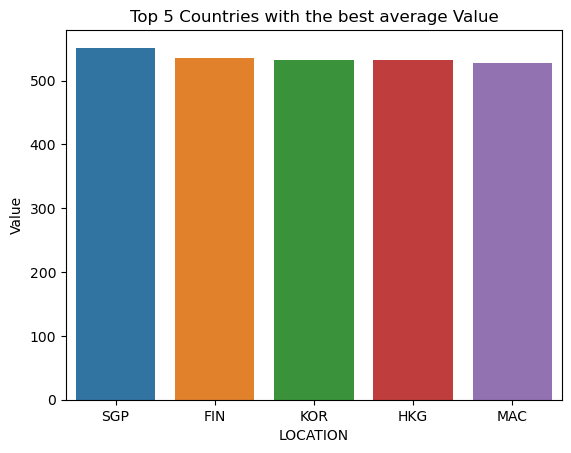

In [89]:
country = pisa_df.groupby(by='LOCATION').agg({'Value' : 'mean'})
top_countries = country.sort_values(by='Value', ascending=False)
top_countries.reset_index(inplace=True)
top5 = top_countries.head(5)
sb.barplot(x='LOCATION', y='Value', data=top5)
plt.title("Top 5 Countries with the best average Value")
plt.show()

<b>ΠΟΙΑ ΕΙΝΑΙ Η ΠΡΟΟΔΟΣ ΤΗΣ ΕΛΛΑΔΑΣ ΣΤΟ ΔΙΑΓΩΝΙΣΜΟ?

Φυσικό και επόμενο θα μπορούσε να χαρακτηρίσει κανείς την ανάγκη να δει σε τί θέση βρίσκεται η χώρα του.<br>
Τα αποτελέσματα στα σκορ είναι αρκετά ικανοποιητικά, δεδομένου τους πόρους που διαθέτει το κράτος για τα σχολεία, καθώς και την αξία της εκπαίδευσης στην ελληνική κοινωνία.<br>
Αξιοσημείωτο είναι το γεγονός ότι το μάθημα στο οποίο καταγράφουμε τα υψηλότερα σκορ(και μάλιστα σε παγκόσμιο επίπεδο) είναι η κατανόηση κειμένου και ότι τα κορίτσια είναι αυτά με τις υψηλότερες βαθμολογίες.

Σημαντικό είναι πως οι καμπύλες από το 2008 (περίπου) και μετά παρουσιάζουν σχεδόν κατακόρυφη κλίση προς τα κάτω, δηλαδή τα σκορ των ελλήνων μαθητών στο διαγωνισμό ολοένα και φθίνουν. Ένας μεγάλος παράγοντας σε αυτο το φαινομενο ίσως είναι και η οικονομική κρίση του 2008-2010.

In [113]:
pisa_gr = pisa_df[pisa_df['LOCATION'] == 'GRC']
pisa_gr.head(10)

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
106,106,GRC,PISAMATH,BOY,2003,455.000
107,107,GRC,PISAMATH,BOY,2006,462.000
108,108,GRC,PISAMATH,BOY,2009,473.000
109,109,GRC,PISAMATH,BOY,2012,457.039
110,110,GRC,PISAMATH,BOY,2015,454.000
111,111,GRC,PISAMATH,BOY,2018,452.000
112,112,GRC,PISAMATH,GIRL,2003,436.000
113,113,GRC,PISAMATH,GIRL,2006,457.000
114,114,GRC,PISAMATH,GIRL,2009,459.000
115,115,GRC,PISAMATH,GIRL,2012,448.984


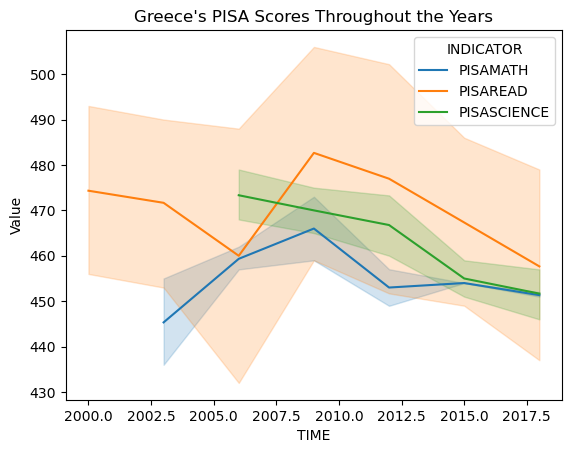

In [116]:
sb.lineplot(x='TIME', y='Value', data=pisa_gr, hue='INDICATOR')
plt.title("Greece's PISA Scores Throughout the Years")
plt.show()

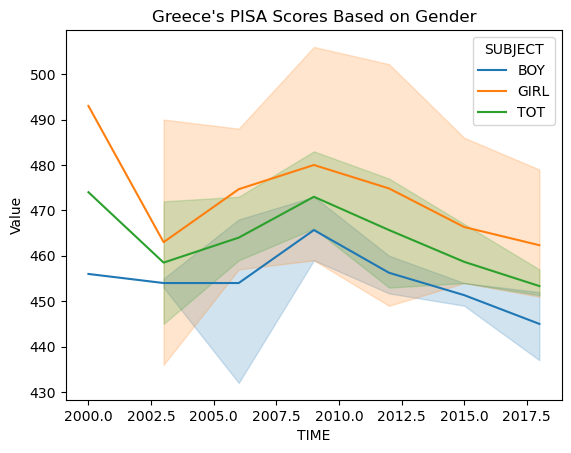

In [119]:
sb.lineplot(x='TIME', y='Value', data=pisa_gr, hue='SUBJECT')
plt.title("Greece's PISA Scores Based on Gender")
plt.show()

<b> PISA 2000 VS 2018. ΤΙ ΕΧΕΙ ΑΛΛΑΞΕΙ ΚΑΙ ΓΙΑΤΙ?

Στο συγκεκριμένο κομμάτι ήθελα να καταγράψω οποιαδήποτε διαφορά στα δεδομένα από την αρχή του χρόνου (για το dataset) μέχρι και το τέλος του.<br>
Από το 2000 μέχρι και το 2018 μεσολάβησαν αρκετά γεγονότα που επηρέασαν λαούς παγκοσμίως, με ίσως σημαντικότερα απ' όλα την οικονομική κρίση του 2008 και την τεχνολογική εξέλιξη, συνοδευόμενη από την άνθηση των social media.<br>
O οικονομικός παράγοντας  είναι ίσως και ο ισχυρότερος που μπορεί να επηρεάσει την εκπαίδευση και την αξία της.<br>
Σε κουμουνιστικά κράτη, όπως η Κίνα, αλλά και σε άλλες χώρες της ασίας, πχ Ινδία, Ν. Κορέα, η εκπαίδευση και η εισαγωγή στην τριτοβάθμια αποτελεί συχνά μοναδικό παράγοντα για τις αγροτικές και τις μικροαστικές οικογένειες να "αλλάξουν" τη ζωή τους προς το καλύτερο, δηλαδή να αποφοιτήσουν από Πανεπιστήμιο με υψηλό prestige, για να βρουν δουλειά ικανοποιητικών αποδοχών και να επιβιώσουν στις μεγάλες πόλεις. Τα εξωσχολικά φροντιστήρια είναι αναγκαίο μέρος αυτού του καθεστώτος, προκειμένου να καταφέρει ένας μαθητής να γράψει καλά στις τελικές εξετάσεις και η οικονομικη συμμετοχή σε αυτά υπέρογκη.<br>
Φυσικά με τον τόσο υψηλό ανταγωνισμό για εισαγωγή στην τριτοβάθμια εκπαίδευση, αλλά και τον κορεσμό της αγοράς εργασίας, άλλαξε και η αξία της εκπαίδευσης. Ακραίο παράδειγμα το κίνημα "Lying Flat", όπου νέοι με πτυχία δεν βρίσκουν δουλειές με ικανοποιητικές αποδοχές και αρνούνται να δουλέψουν μόνο για τον κατώτατο μισθό.<br>
Επίσης, η ανάπτυξη του ίντερνετ και των social media, συνεισέφερε στην εκπαίδευση & στη γνώση αλλά και συντέλεσε στον καταιγισμό της, με φαινόμενα όπως το cyber bullying, μείωση του attention spam κλπ.

Συνεπώς το οικονομικό υπόβαθρο μιας οικογένειας, οι οικονομικές & τεχνολογικές συνθήκες της χώρας που ζει κάποιος επηρεάζουν άμεσα όχι μόνο την εκπαίδευσή του και κατά συνέπεια και τη ζωή του.

In [133]:
pisa00 = pisa_df[pisa_df['TIME'] == 2000]

In [136]:
country00 = pisa00.groupby(by='LOCATION').agg({'Value' : 'mean'})
top00 = country00.sort_values(by='Value', ascending=False)
top00.reset_index(inplace=True)
top00

,LOCATION,Value
0,FIN,545.666667
1,CAN,534.666667
2,NZL,529.666667
3,AUS,529.000000
4,IRL,527.333333
5,KOR,525.666667
6,JPN,522.000000
7,SWE,517.000000
8,BEL,508.000000
9,ISL,507.666667


In [142]:
pisa18 = pisa_df[pisa_df['TIME'] == 2018]
country18 = pisa18.groupby(by='LOCATION').agg({'Value' : 'mean'})
top18 = country18.sort_values(by='Value', ascending=False)
top18.reset_index(inplace=True)
top18

,LOCATION,Value
0,EST,525.555556
1,JPN,520.000000
2,KOR,519.777778
3,CAN,516.777778
4,FIN,516.444444
5,POL,512.777778
6,IRL,504.666667
7,SVN,503.888889
8,GBR,503.555556
9,NZL,502.777778


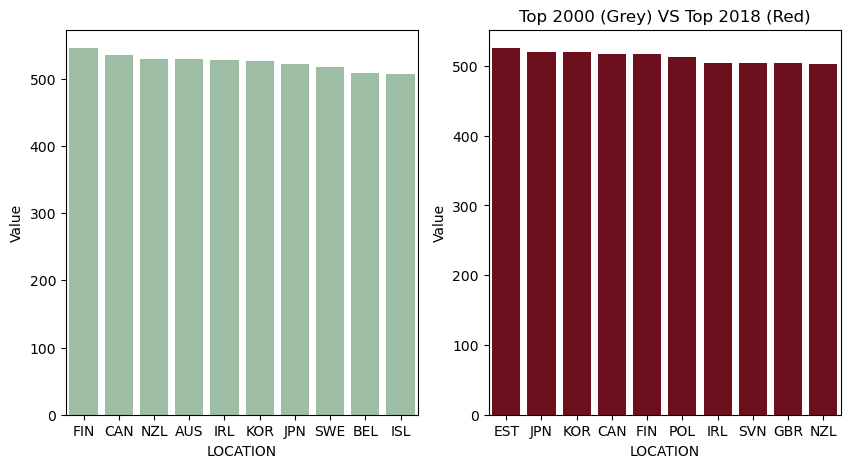

In [151]:
plt.figure(figsize = [10,5]);
plt.subplot(1,2,1);
sb.barplot(x='LOCATION', y='Value', data=top00.head(10), color='#99c2a2')
plt.subplot(1,2,2);
sb.barplot(x='LOCATION', y='Value', data=top18.head(10), color='#7d0013')
plt.title("Top 2000 (Grey) VS Top 2018 (Red)")
plt.show()

Σταθερά και στα 2 γραφήματα βρίσκονται αγγλοσαξονικές χώρες και χώρες της ανατολικής ασίας. Αυτό που αλλάζει είναι η σειρά κατάταξης. Χώρες όπως η Ιαπωνία και η Κορέα φαίνεται πως επιτυγχάνουν υψηλότερα σκορ και να αφήνουν πίσω τους Καναδά-Ν.Ζηλανδία και πλούσιες ευρωπαϊκές χώρες όπως το Βέλγιο.<br>
Αν κοιτάξουμε και την κατάταξη της Ελλάδας ή της Πορτογαλίας, που είναι 2 χώρες στη ευρώπη που πλέιχθηκαν από την οικονομική κρίση βαθύτατα++ επενδύουν τα λιγότερα κρατικά χρήματα στην εκπαίδευση, θα παρατηρήσουμε ότι εμφανίζουν κατηφορική πρόοδο και πέφτουν σημαντικά κάτω από το μέσο όρο των υπόλοιπων χωρών της Ευρώπης (OAVG).

<b>ΠΟΙΟ ΦΥΛΟ ΚΑΙ ΠΟΙΑΣ ΧΩΡΑΣ ΕΙΝΑΙ ΤΟ ΚΑΛΎΤΕΡΟ ΣΤΑ ΜΑΘΗΜΑΤΙΚΑ?<br>

Συχνά αναφέρεται η φτωχή γνώση μαθηματικών από τις νεότερες γενιές. Από το γράφημα καταλαβαίνουμε πως μόνο στις 3 πρώτες χώρες τα κορίτσια βρίσκονται στα ίδια ή και καλύτερα επίπεδα γνωσεις με τα αγόρια, ενώ σε Taiwan & S. Korea δεν βρέθηκε συμμετοχή κοριτσιών στην εξέταση των μαθηματικών. Επίσης, αξιοσημείωτο είναι το γεγονός πως στις τοπ θέσεις υπάρχουν μόνο χώρες της ανατολικής ασίας..<br>
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.quickmeme.com%2Fimg%2F7c%2F7c1dc789f4475eaa0690005fb849cfaccbac3ab6a671a0959f7e9b2adb1ae9ad.jpg&f=1&nofb=1&ipt=4c3c06d226f81a31030660a1c89f1872efde7a9734e0cd7b84f1c514f82c7e4a&ipo=images" width='250' height='300'>

In [9]:
math = pisa_df[pisa_df['INDICATOR'] == 'PISAMATH']

In [12]:
best_math = math.groupby(by=['LOCATION', 'SUBJECT']).agg({'Value' : 'mean'})

In [15]:
top_math = best_math.sort_values(by='Value', ascending=False).head(10)
top_math.reset_index(inplace=True)

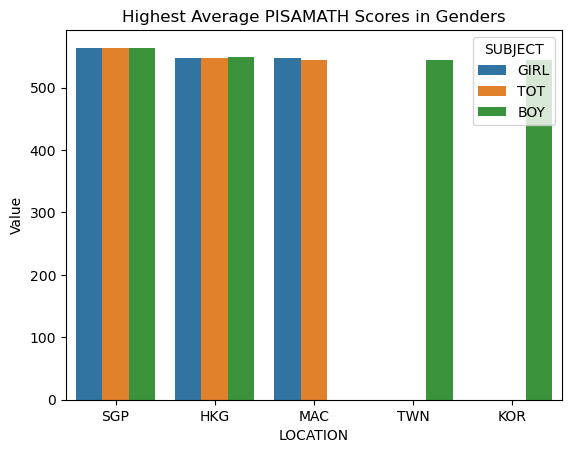

In [18]:
sb.barplot(x='LOCATION', y='Value', data=top_math, hue='SUBJECT')
plt.title("Highest Average PISAMATH Scores in Genders")
plt.show()

<b>ΠΟΙΑ ΕΙΝΑΙ Η ΧΡΟΝΙΑ ΜΕ ΤΑ ΚΑΛΥΤΕΡΑ ΣΚΟΡ?

Όπως φαίνεται παρακάτω, από το 2015 μέχρι και το 2018 επιτεύχθηκαν τα μεγαλύτερα σκορ στο διαγωνισμό.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


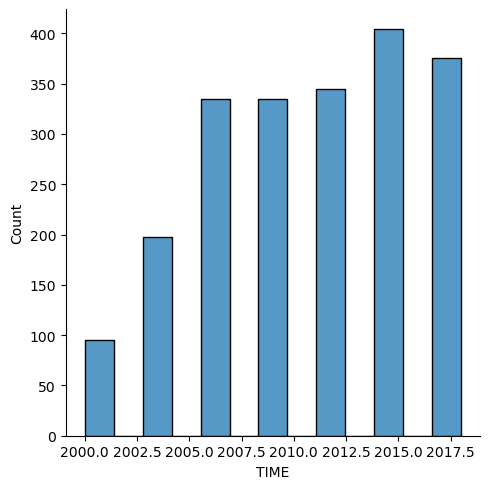

In [24]:
sb.displot(pisa_df.TIME)
plt.show()

<b>ΑΝΑΛΥΣΗ ΠΑΛΙΝΔΡΟΜΗΣΗΣ-LINEAR REGRESSION OF TIME & VALUE

Πραγματοποιώ ανάλυση γραμμικής παλινδρόμησης για να προσδιορίσω τη σχέση μεταξύ έτους και σκορ στο διαγωνισμό & να προβλέψω τη μελλοντική κατανομή των σκορ.<br>
Ουσιαστικά έχω τη σχέση <b>Y=m*X + c</b> και προσπαθώ μέσω ενός μοντέλου να το εκπαιδεύσω και στη συνέχεια να το χρησιμοποιήσω για να εντοπίσω τις τιμές των συντελεστών c, m . Οι τιμές του διανύσματος Χ είναι αυτές του έτους και αντιπροσωπεύουν την ανεξάρτητη μεταβλητή & οι τιμές του διανύσματος Υ είναι αυτές του σκορ και αντιπροσωπεύουν την εξαρτημένη μεταβλητή.<br>
Η γραμμική παλινδρόμηση δουλεύει μόνο με αριθμητικά δεδομένα, οπότε ήταν και αρκετά δύσκολο να εφαρμοστεί στο συγκεκριμένο dataset που περιέχει μόνο 1 στήλη με αριθμητικά δεδομένα και όλα τα υπόλοιπα είναι κατηγορικά.<br>

Πρώτα, αντιπροσωπεύω τα Χ, Υ με τις κατάλληλες στήλες του συνόλου δεδομένων και αναπαριστώ το scatterplot τους.

In [34]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")
pisa_df=pisa_df[['TIME','Value']]

In [37]:
X = pisa_df['TIME']
Y = pisa_df['Value']

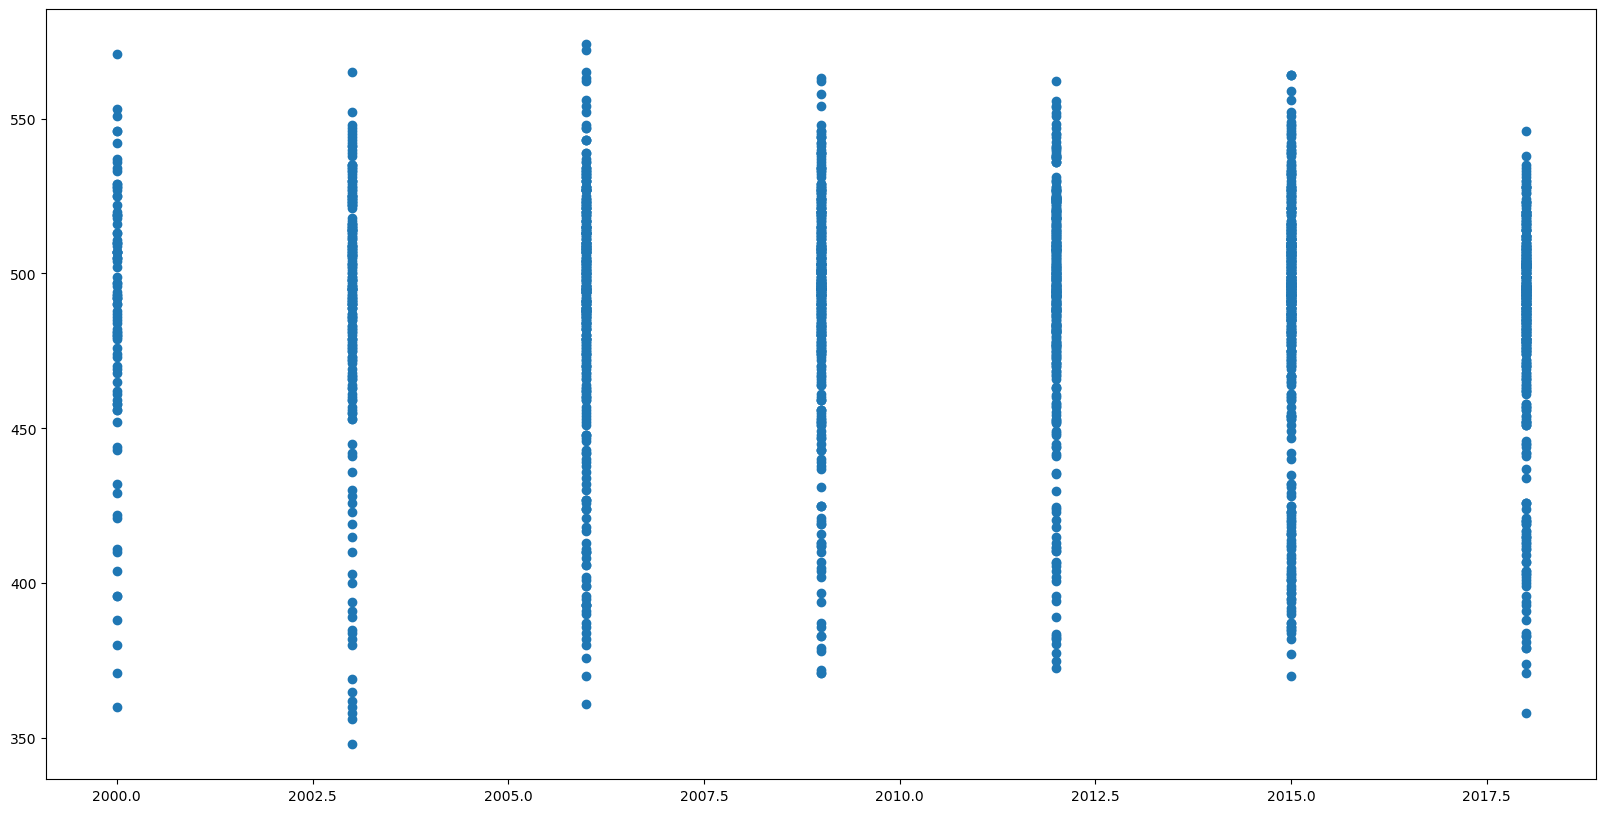

In [40]:
plt.figure(figsize = [20,10]);
plt.scatter(X,Y)

Στη συνέχεια, με τη βοήθεια του sklearn, φτιάχνω train & test σύνολα για τις Χ, Υ και loadάρω το LinearRegression() Model του πακέτου στο οποίο εφαρμόζω με την fit τα 2 training sets.<br>
Test size = 40%, δλδ το 40% των δεδομένων θα χρησιμοποιηθεί για testing. Τα sets δημιουργούντα με random τρόπο κάθε φορά. Με την array τροποποιώ τα sets σε 2D διανύσματα.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=23)

In [53]:
X_train = np.array(X_train).reshape(-1,1)

In [51]:
X_test = np.array(X_test).reshape(-1,1)

In [56]:
lr = LinearRegression() #model

In [59]:
lr.fit(X_train, Y_train)

LinearRegression()

Υπολογισμός των 2 συνετλεστών της γραμμικής εξίσωσης της παλινδρόμησης, σύμφωνα με Υ=m*X+c

In [62]:
c = lr.intercept_

In [64]:
m = lr.coef_

In [66]:
c, m

(1322.9287294928272, array([-0.41535806]))

Υπολογισμός του Υ

Mπορώ να το υπολογίσω και με την συνάρτηση predict του πακέτου αλλά και με το χέρι.

In [72]:
Y_pred_train1 = lr.predict(X_train)
Y_pred_train1

array([489.72045319, 484.73615642, 485.98223061, ..., 490.96652738,
       489.72045319, 490.96652738])

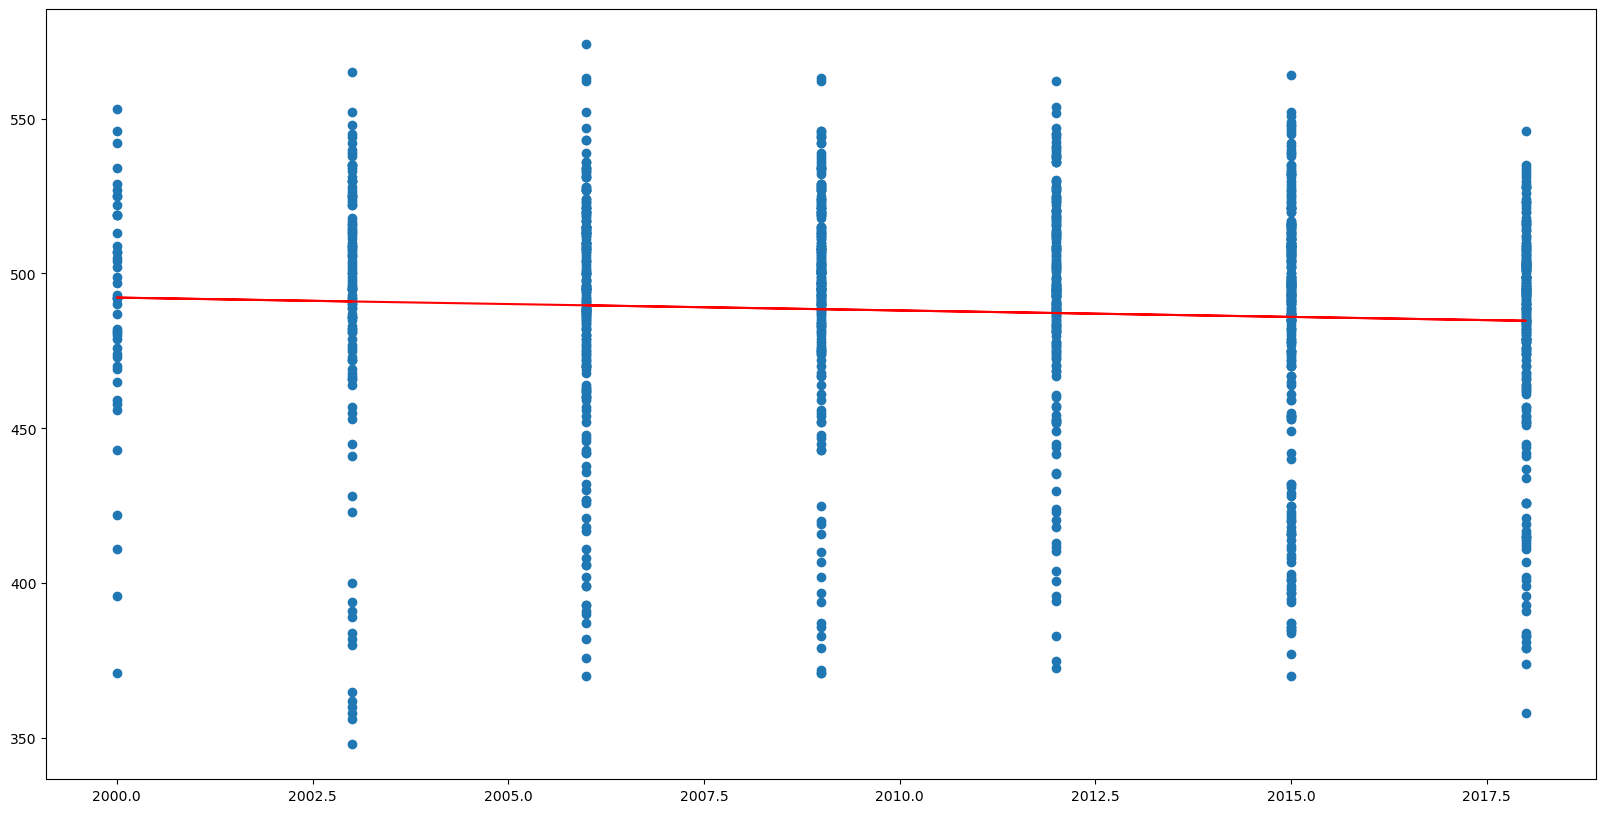

In [75]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

Συμπέρασμα: από το 2000 και έπειτα η κόκκινη γραμμή παρουσιάζει μια σταθερότητα με μια ελάχιστη αρνητκή κλίση(αρνητικό m). Δηλαδή τα σκορ παρουσιάζουν μια ελάχιστη μείωση ανά τα έτη, ενώ σε γενικές γραμμές παραμένουν σταθερά χωρίς μεγάλες αποκλίσεις.

In [99]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [103]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [105]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.164082151202095
Mean Squared Error (MSE): 1434.9865065646225
R-squared (R2): -0.0023407759798435013


MAE: It measures the average absolute difference between the predicted values and the actual values of the target variable<br>
MSE:Squares the differences before averaging, emphasizing large errors <br>
R2:Represents the proportion of variance in the target variable explained by the model. While useful, it doesn't tell you the actual magnitude of errors.<br>

Πραγματοποίησα την παραπάνω διαδικάσια και για να βρω τη σχέση μεταξύ score-φύλο, αφού πρώτα μετέτρεψα τα κατηγορικά δεδομένα.<br>
-> στη στήλη των φύλων
1= αγόρι
2= κορίτσι και
3= TOT

Και εδώ φαίνεται το αποτέλεσμα!

In [92]:
c = lr.intercept_
m = lr.coef_
c, m

(486.5245872956582, array([0.56562876]))

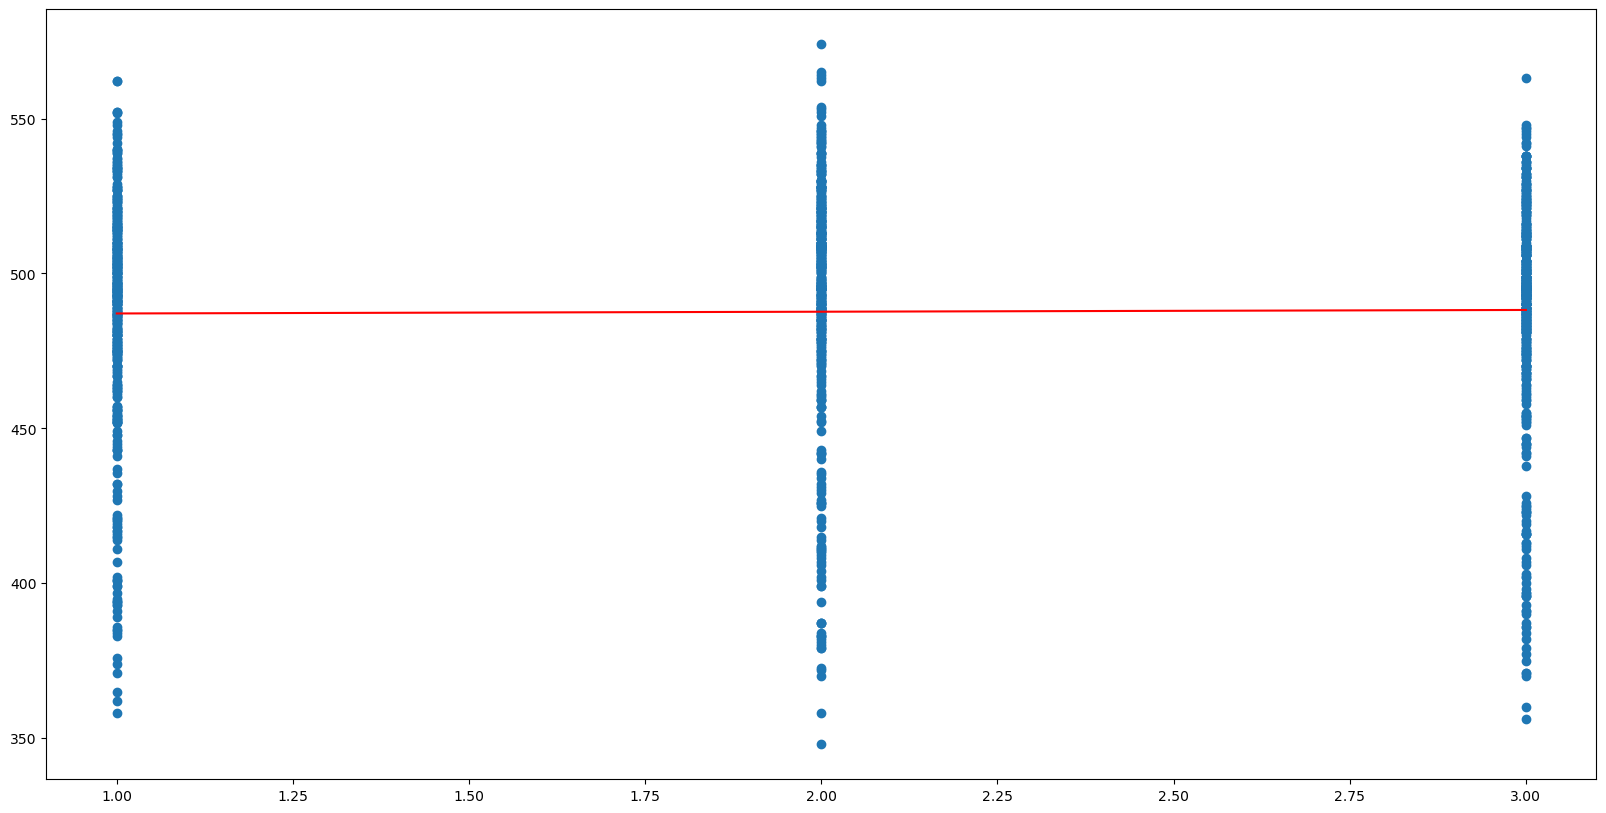

In [102]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

Συμπέρασμα: οι συντελεστές είναι θετικοί και από το γράφημα καταλαβαίνουμε πως τα φύλα παρουσιάζουν σταθερές επιδόσεις στον διαγωνισμό, με μια ελάχιστη βελτίωση των κοριτσιών.

In [214]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [216]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [218]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.059876499544465
Mean Squared Error (MSE): 1428.3622005304455
R-squared (R2): 0.002286314254280497


Το ΜΑΕ και εδώ είναι 28%.

<b>ANOVA-ΑΝΑΛΥΣΗ ΔΙΑΚΥΜΑΝΣΗΣ

Πραγματοποιήθηκε ανάλυση διακύμανσης για να εντοπίσω στατιστικές σημαντικές διαφορές μεταξύ των χωρών ανάμεσα στα 2 φύλα.

In [80]:
pisa_df= pd.read_csv('PISA_data.csv', encoding = "ISO-8859-1")

Text(0.5, 1.0, 'Boxplot of Countries and Scores of Genders')

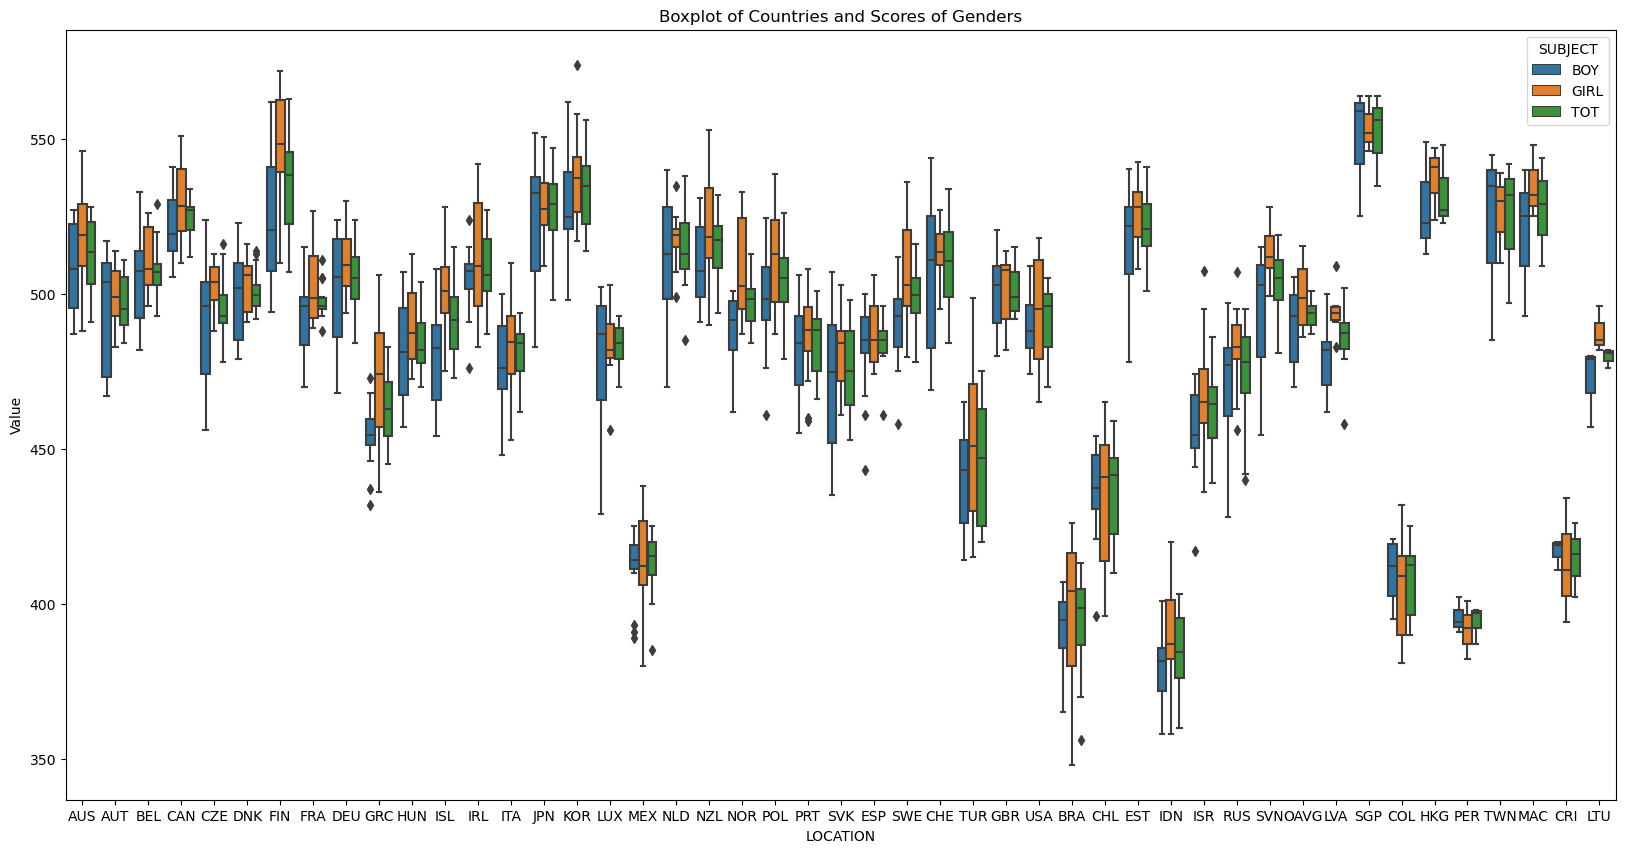

In [83]:
plt.figure(figsize = [20,10]);
sb.boxplot(y='Value', x='LOCATION', data=pisa_df, hue='SUBJECT')
plt.title('Boxplot of Countries and Scores of Genders')

In [86]:
from scipy import stats

Μετρώντας τα unique values στις χώρες και προσθέτοντάς τες στη λίστα l_pisa με for-loop, εφαρμόζω One Way Anova & βρίσκω p-value=0, δηλαδή απορρίπτω Η0. Άρα, υπάρχει στατιστικά σημαντική διαφορά ανάμεσα στα φύλα και στις χώρες. Και όσο μεγαλύτερο το f τόσο μεγαλυτερο το variation μεταξύ των group. 

In [88]:
cnts = pd.unique(pisa_df.LOCATION.values)
l_pisa = [pisa_df['Value'][pisa_df.LOCATION == cnt] for cnt in cnts]
f, p = stats.f_oneway(*l_pisa)

In [90]:
f, p

(272.7298359364653, 0.0)

Text(0.5, 1.0, 'Boxplot of Countries and Scores of Math, Reading & Science')

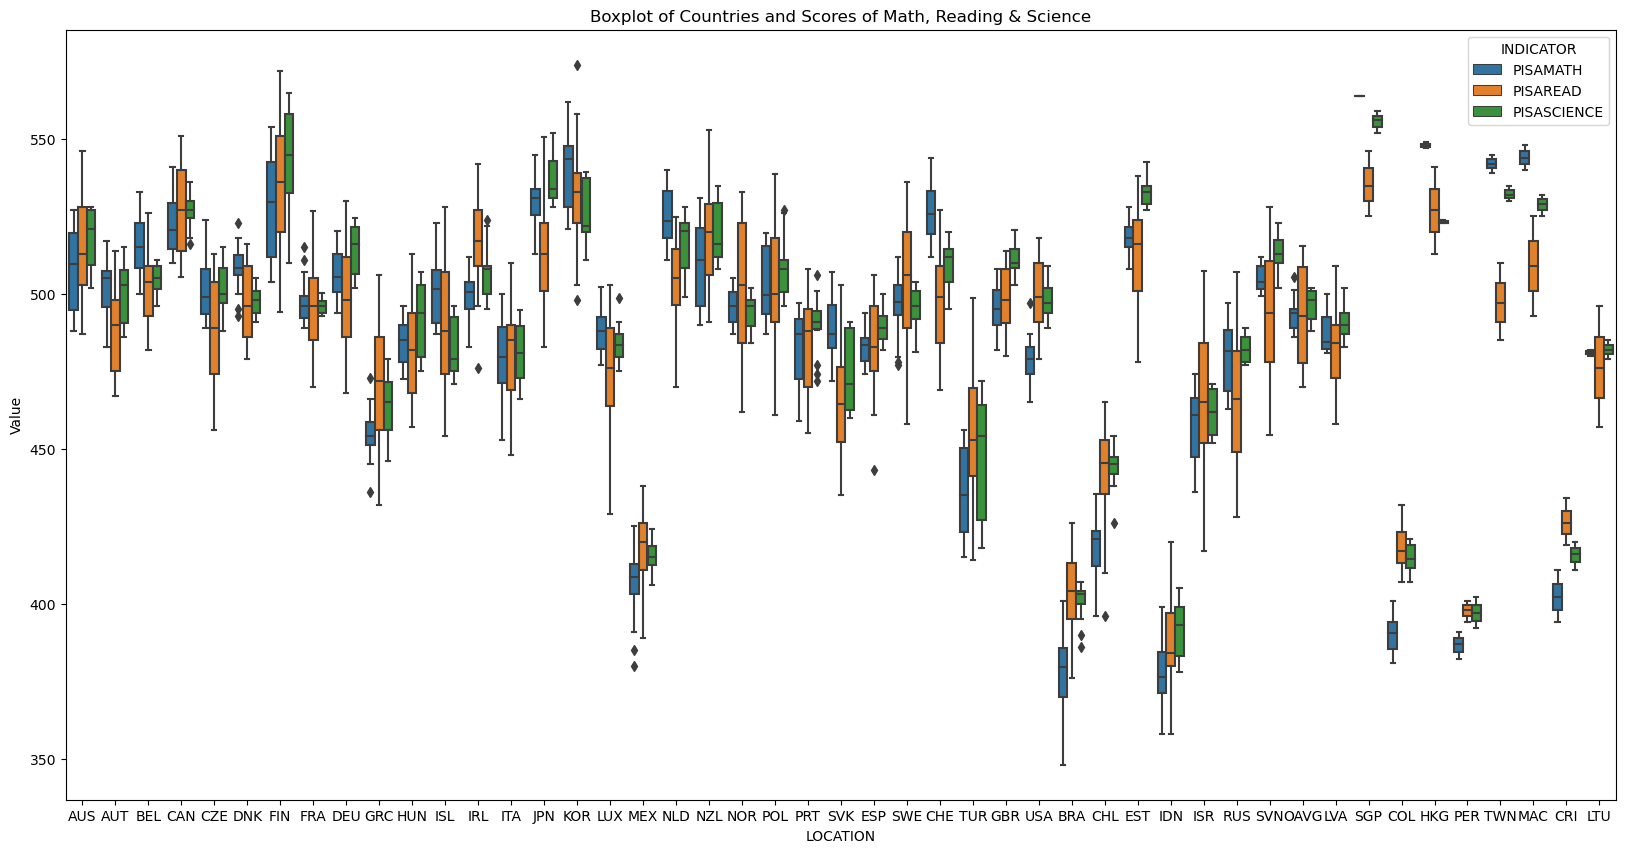

In [31]:
plt.figure(figsize = [20,10]);
sb.boxplot(y='Value', x='LOCATION', data=pisa_df, hue='INDICATOR')
plt.title('Boxplot of Countries and Scores of Math, Reading & Science')

<b>REGRESSION ΓΙΑ MATH,SCIENCE & READING ΜΕ ΤΟ ΦΥΛΟ

ανάλυση παλινδρόμησης των διάφορων μαθημάτων που εξετάσθηκαν οι συμμετέχοντες με το φύλο που τους προσδιορίζει για να βρώ τη μαθηματική σχέση που χαρακτηρίζει τις 2 μεταβλητές. Αρχικά, κάνω ανάλυση συσχέτισης και στη συνέχεια έχοντας μετατρέψει τις κατηγορικές μεταβλητές σε αριθμητικές (όπου 1=αγορι & 2=κορίτσι και 1=μαθ, 2=διαβασμα & 3=επιστημες) πραγματοποιώ ανάλυση παλινδρόμησης. 

Χ= indicator & Y=subject. Οι συντελεστές της εξίσωσης φαίνονται παρακάτω.

In [63]:
c = lr.intercept_
m = lr.coef_
c, m

(2.0129672136936687, array([0.01179379]))

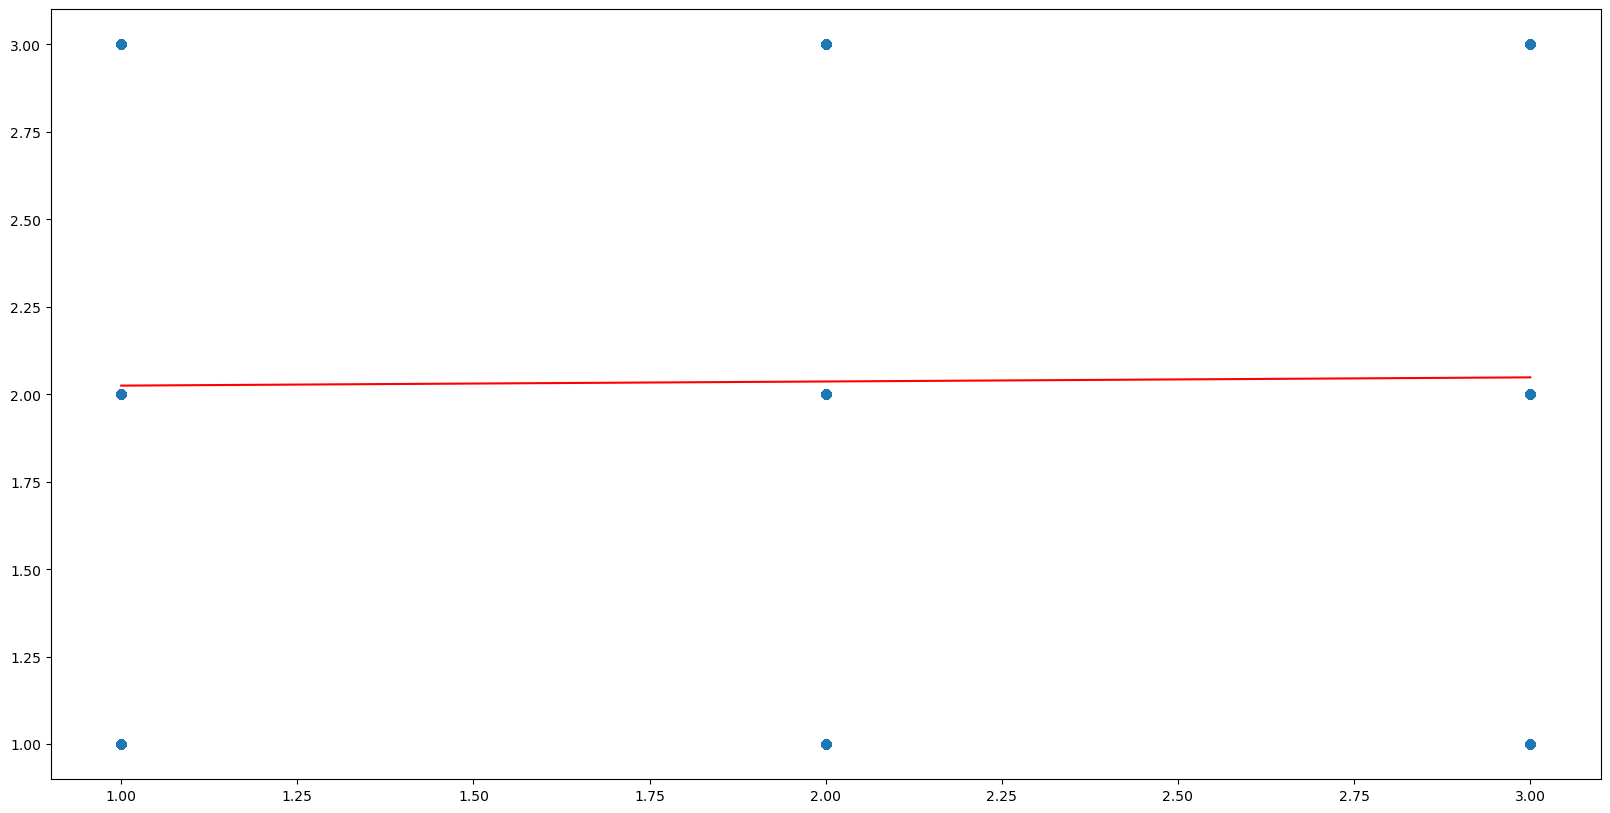

In [69]:
plt.figure(figsize = [20,10]);
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train1, color='red')

Συμπέρασμα: και τα 2 φύλα παρουσιάζουν σταθερές επιδόσεις στα μαθήματα με τα κορίτσια να παρουσιάζουν μικρή βελτίωση.

In [184]:
## Make predictions on the test set
y_pred = lr.predict(X_test)

In [186]:
## Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [188]:
## Print evaluation metrics
print("\n11. Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


11. Model Evaluation:
Mean Absolute Error (MAE): 28.231201764820565
Mean Squared Error (MSE): 1440.0489330516396
R-squared (R2): -0.00587689041027506


<b>LOGISTIC REGRESSION

Λογιστική παλινδρόμηση για τις μεταβλητές indicator=y & value=x. Παρακάτω, φαίνονται ο confusion matrix & accuracy.<br>
Τα αποτελέσματα του confusion matrix σε συνδυασμό με την 36% ακρίβεια, δεν είναι ικανοποιητικά. Άρα δεν μπορούμε να βγάλουμε σαφή συμπεράσματα πρόβλεψης για την σχέση μαθημάτων-σκορ.

In [16]:
#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 216,   0],
       [  0, 230,   0],
       [  0, 181,   0]])

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3668261562998405


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


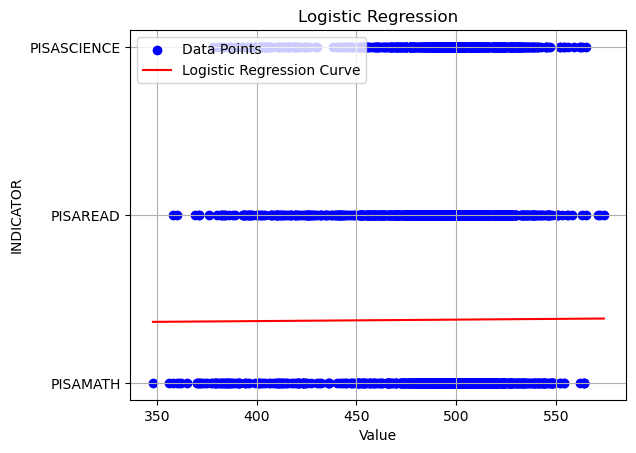

In [160]:
# Extracting features and target variable
X = pisa_df[['Value']]  # Features (independent variable)
y = pisa_df['INDICATOR']  # Target variable (dependent variable)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the logistic regression curve
x_values = np.linspace(pisa_df['Value'].min(), pisa_df['Value'].max(), 500).reshape(-1, 1)
y_values = model.predict_proba(x_values)[:, 1]  # Probabilities of the positive class

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Logistic Regression Curve')
plt.xlabel('Value')
plt.ylabel('INDICATOR')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

Δοκίμασα διάφορες παραλλαγές οπτικοποίησης της καμπύλης ROC, αλλά δεν ήταν εφικτό. Στο αρχείο με τον κώδικα φαίνονται οι διαφορετικές προσεγγίσεις. Κύρια αιτία: το error που εμφάνιζε για την μη υποστήριξη mutli-class format.

In [97]:
# Compute ROC curve and ROC area
#https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic, pos_label=1)
roc_auc = auc(fpr, tpr)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


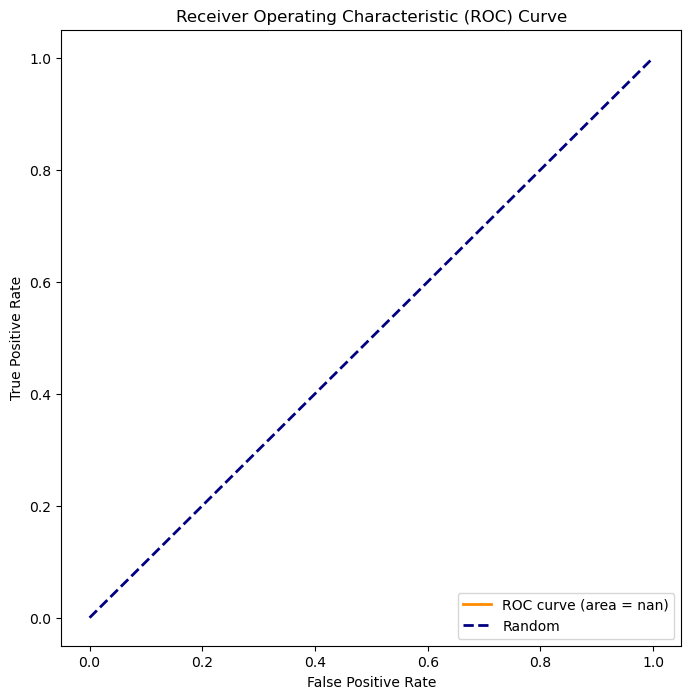

In [91]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


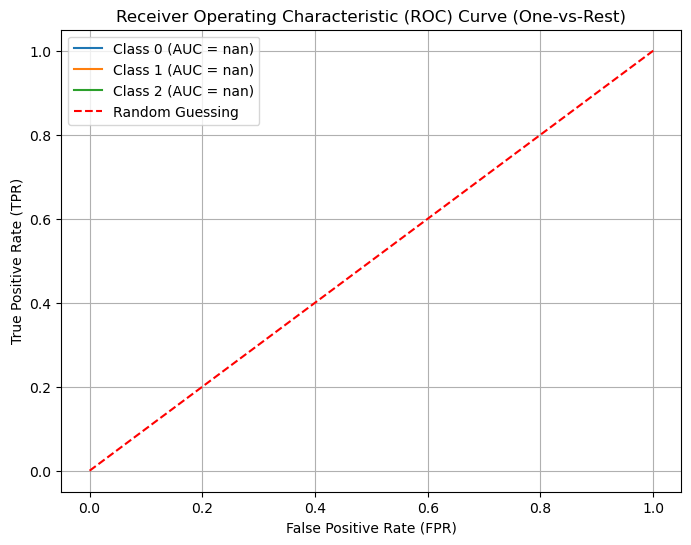

In [174]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# Make sure you've already trained the model as shown in the previous example

# Predict probabilities for each class
y_probs = model.predict_proba(X)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(model.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


<b>K-MEANS: INDICATOR & VALUE

Clustering με τη χρήση k-means για την ομαδοποίηση των σκορ βάσει των μαθημάτων. Χρήση της μεθόδου k-means του sklearn.cluster με κ=2.
Αρκετά δύσκολο να εφαρμοστεί k-means με καλύτερο αποτέλεσμα γιατί στο dataset υπήρχε μόνο 1 στήλη με αριθμητικά δεδομένα. Θα μπορούσε να γίνει σε συνδυασμό με τους κωδικούς των χωρών, εάν γνωρίζαμε την αντιστοιχία τους.

IndexError: index 2 is out of bounds for axis 1 with size 2

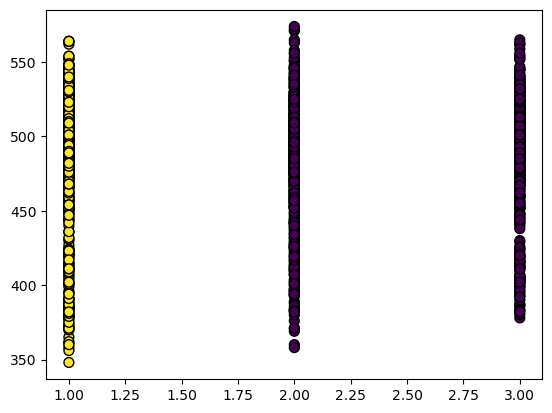

In [54]:
# Visualize the clusters
plt.scatter(X['INDICATOR'], X['Value'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of PISA Results')
plt.legend()
plt.show()

<b>PCA: Indicator, Subject, Value

PCA μεταξύ φύλου και μαθηματος και μεταξύ σκορ στο διαγωνισμό και μαθήματος για μείωση διάστασης δεδομένων, εύρεσης correlation & εξαγωγής χαρακτηριστικών. Το k=2. Έγιναν προσπάθειες και για 3D απεικόνιση για καλύτερη οπτικοποίηση.

In [124]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.35256394 0.33348043]


INDICATOR & VALUE RESULT

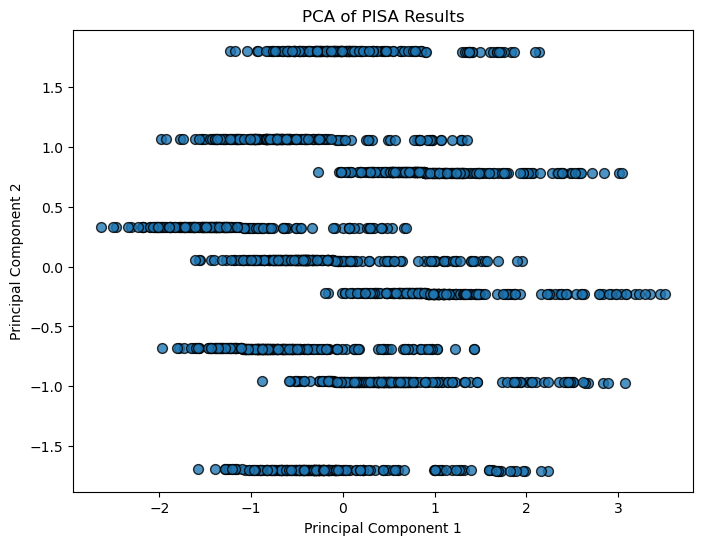

In [126]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], edgecolor='k', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of PISA Results')
plt.show()

INDICATOR & SUBJECT RESULT

In [113]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.50022947 0.49977053]


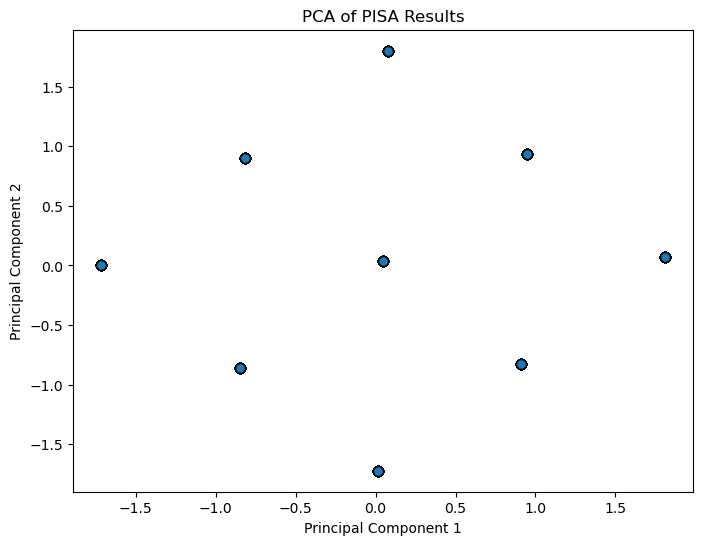

In [115]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], edgecolor='k', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of PISA Results')
plt.show()

<b>AUTOREGRESSION MODEL FOR FORECASTING

Με τις στηλες time & value του dataset εκπαιδεύω τον autoregression μοντέλο και κάνω πρόβλεψη για το πως κυμαίνονταν τα test scores παρελθόν και στο μέλλον. Όσο προχωράμε στο χρόνο φαίνονται τα σκορ στο διαγωνισμό να μειώνονται. Τι ακριβώς μπορεί να σημαίνει αυτό? Το επίπεδο εκπαίδευσης γίνεται πιο παρωχημένο ή προχωράμε σε μια εποχή όπου οι δεξιότητες υπερτερούν και η γνώση έρχεται σε δεύτερη μοίρα?

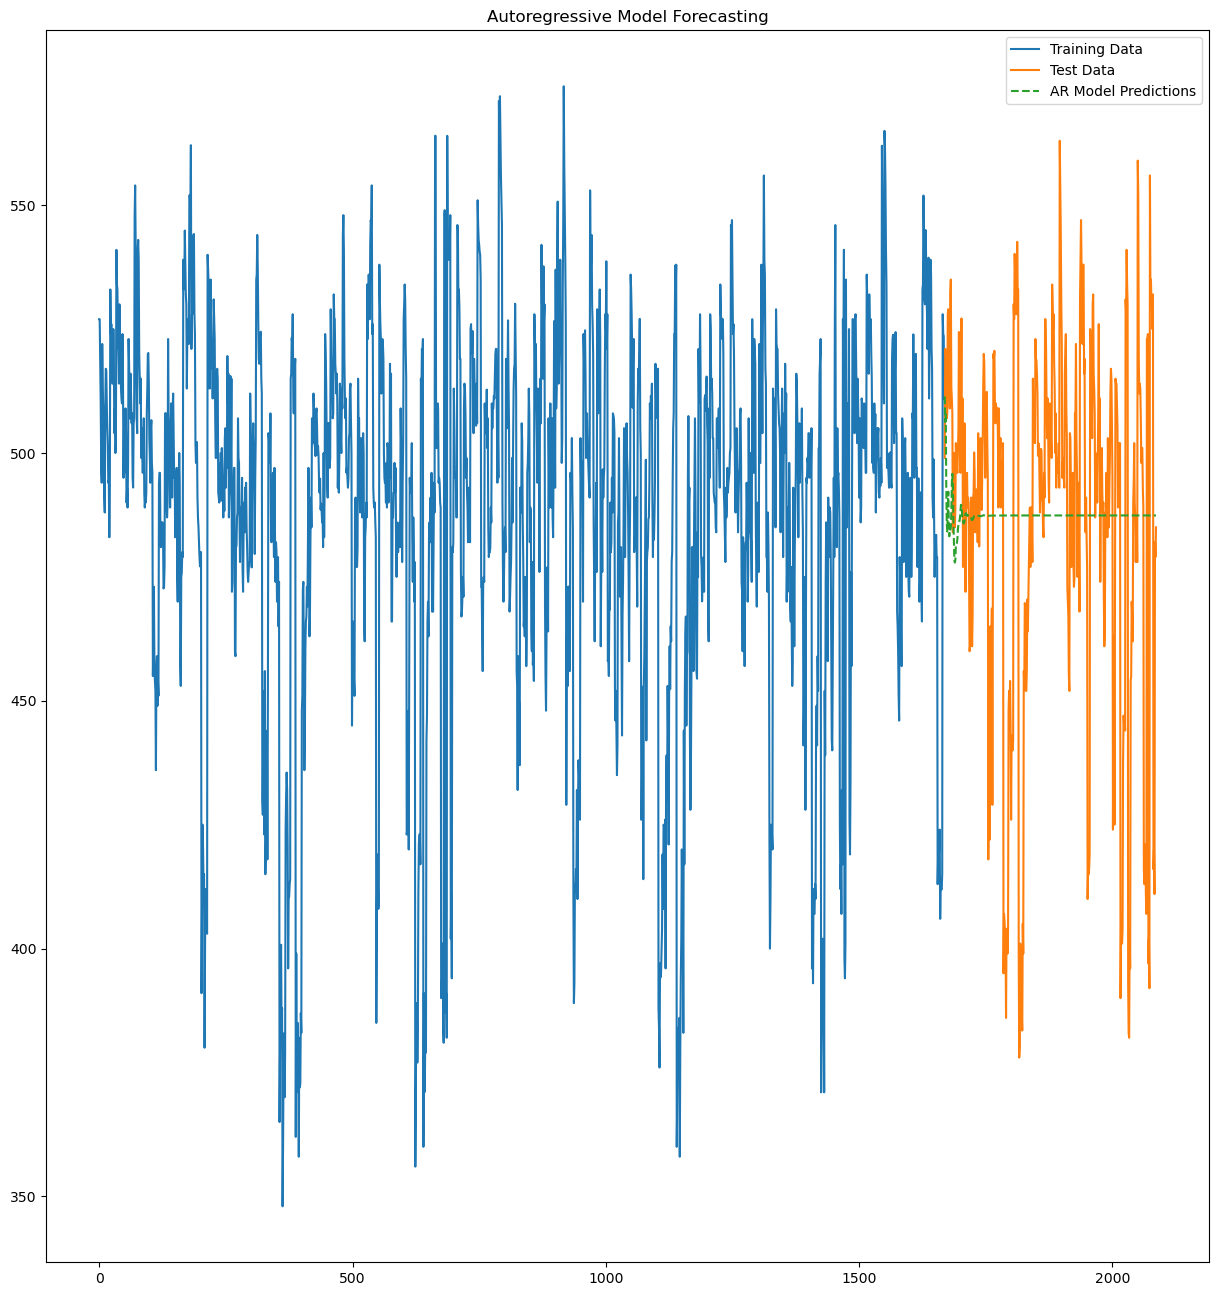

In [144]:
# Plot the results
plt.figure(figsize=(15, 16))
plt.plot(train['Value'], label='Training Data')
plt.plot(test['Value'], label='Test Data')
plt.plot(predictions, label='AR Model Predictions', linestyle='--')
plt.title('Autoregressive Model Forecasting')
plt.legend()
plt.show()

<b>FOR FUTURE:

In [42]:
# Import necessary libraries
import pandas as pd
import statsmodels as sm

# Load your dataset
data = pd.read_csv("PISA_data.csv")

# Extract TIME and Value columns
time_data = data["TIME"]
value_data = data["Value"]

# Check for missing values and handle them if needed
if data.isnull().values.any():
    print("Warning: Missing values found!")
    # Handle missing values using appropriate methods (e.g., imputation, deletion)

# Convert TIME column to datetime object (if needed)
# Assuming TIME is in a format suitable for conversion
time_data = pd.to_datetime(time_data)

# Define model parameters (adjust based on your data)
p = 2  # number of autoregressive terms
q = 1  # number of integrated terms
d = 0  # number of differencing terms (usually determined by checking stationarity)

# Create  model
model = sm.tsa.ar_model.AutoReg(value_data, lags=30)

# Fit the model
fitted_model = model.fit()

# Define number of steps to predict
n_steps = 10  # predict 10 future values

# Predict future values
predicted_values = fitted_model.forecast(steps=n_steps)

# Print predicted values
print("Predicted future values:")
print(predicted_values)

Predicted future values:
2087    467.829169
2088    483.746376
2089    475.045970
2090    478.656764
2091    471.189739
2092    480.566452
2093    489.651532
2094    500.113702
2095    490.655597
2096    479.653757
dtype: float64


<b>ATTEMPTS</b><br>
check pisa_anal.ipynb<br>
Έγιναν προσπάθειες για εφαρμογή dePDDP, decision-tree making, οπτικοποίηση γραφήματος ROC Curve, geospatial analysis with folium & HiPart implementation.

<b>ΑΝΑΦΟΡΕΣ:

1) DATASET: https://www.kaggle.com/datasets/thedevastator/pisa-performance-scores-by-country

2) https://www.oecd-ilibrary.org/sites/f7986824-en/index.html?itemId=/content/component/f7986824-en

3) https://www.bbc.com/news/business-60353916

4) https://www.youtube.com/watch?v=IfgFNRnXCMc

5) https://www.youtube.com/watch?v=eE5EvC4aVeE

6) https://www.youtube.com/watch?v=I-CZrIz1g6M

7) https://www.youtube.com/watch?v=ZoRVpz0bUEk

8. https://www.youtube.com/watch?v=SJmrW60OZ5g

9. https://www.youtube.com/watch?v=R83aiucYvek

10. https://www.youtube.com/watch?v=irBgHtzkGxo